# 3. Влияет ли тип магазина на объем продаж?

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy.stats as stats
from scipy.stats.stats import pearsonr

In [2]:
# Загрузка данных
df = pd.read_csv('data/df.csv')

df.date = pd.to_datetime(df.date)
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,month,year
0,2013-01-01,1,Автомобильные товары,0.0,0,Quito,Pichincha,D,13,1,2013
1,2013-01-01,1,Уход за детьми,0.0,0,Quito,Pichincha,D,13,1,2013
2,2013-01-01,1,Косметика,0.0,0,Quito,Pichincha,D,13,1,2013
3,2013-01-01,1,Напитки,0.0,0,Quito,Pichincha,D,13,1,2013
4,2013-01-01,1,Книги,0.0,0,Quito,Pichincha,D,13,1,2013


Чтобы ответить на этот вопрос, используем дисперсионный анализ (ANOVA).

Нулевая гипотеза H0 (>0.05) - Разницы в продажах между разными типами магазинов нет. Тип магазина не влияет на объем продаж.

Альтернативная гипотеза H1 (<0.05) - Разница в продажах между разными типами магазинов есть. Тип магазина влияет на объем продаж.

In [3]:
grouped_data = df.groupby('store_type')['sales']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[grouped_data.get_group(type) for type in grouped_data.groups])

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 17766.023730362205
p-value: 0.0


Принимаем альтернативную гипотезу, так как p-value<0.05. То есть тип магазина влияет на объем продаж.

In [ ]:
'''
sales_per_store_type = df[['store_type', 'sales']]

fig = px.scatter(sales_per_store_type, x='store_type', y='sales',
                 labels={
                     'store_type': 'Тип магазина',
                     'sales': 'Объем продаж'
                 },
                title='Объем продаж для каждого типа магазина')

fig.update_layout(height=650, width=650)

fig.show()
'''

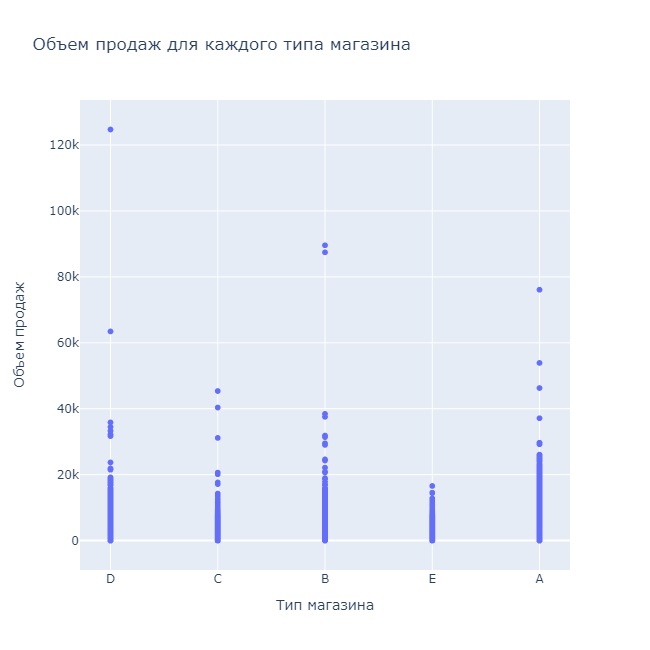

In [5]:
display(Image(filename='img/shop_sales_scatter.png', width=600))